# Week 3: Principle component analysis, the SVD and low-dimensional projections 
[Jacob Page](jacob-page.com)

In this workshop we will work through a set of problems on dimensionality reduction -- a basic example of unsupervised learning (perhaps a better term here would be "self-supervised"). 

We will work with a dataset of images and attempt to use PCA to identify underlying patterns and explore the utility of the associated low-dimensional representations to partition the data into its distinct classes.

---


As you work through the problems it will help to refer to your lecture notes. The exercises here are designed to reinforce the topics covered this week. Please discuss with the tutors if you get stuck, even early on! 


# Imports

We're only going to need a couple of libraries this week. We'll add one or two more as we work through the problems below. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Our dataset will be the famous "MNIST" dataset of handwritten digits, which we will download from the keras library. The dataset consists of a set of greyscale images of the numbers 0-9 and corresponding labels. Usually the goal is to train a classifier (i.e. given an image, what digit does it correspond to?). Here we will throw away the labels and use the images themselves to explore dimensionality reduction, which is an example of a unsupervised learning problem. 

First, load the data:

In [2]:
from tensorflow.keras.datasets import mnist
(images_all_digits, y_all_digits), _ = mnist.load_data() # we are only loading the training set here [unsupervised!]

2023-02-01 09:22:11.890974: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Exercise 0
What object is returned by the command above? What shape/datatype etc if an array?  

In [3]:
#6000 numbers of what the data represents
y_all_digits.shape

(60000,)

In [4]:
#6000 is number of datapoints, 28,28 because you made it as array but you need to change it to vectors
images_all_digits.shape

(60000, 28, 28)

# Exercise 1
Create a dictionary, with the digit classes (0-9) as keys, where the correponding values are the set of all images corresponding to that particular label. 

In [5]:
#Create a dictionary
# a is one of the keys, follow up on b,c,d etc.
example_dict = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4, 'f':5, 'g':6, 'h':7, 'i':7, 'j':8, 'j':9}

In [6]:
#dictionary of your key and release the values 
example_dict['a'] #give keys and return values

0

In [7]:
for keys in example_dict:
    print(keys, example_dict[keys]) 

a 0
b 1
c 2
d 3
e 4
f 5
g 6
h 7
i 7
j 9


In [8]:
mnist_dict = {}

for j in range(y_all_digits.size): 
  current_digit = y_all_digits[j] #basically current digit = the digits in j of the array 
  if current_digit not in mnist_dict: #if it is not a key in dictionary
    mnist_dict[current_digit] = [images_all_digits[j]] #create the key into dictionary
  else:
    mnist_dict[current_digit] += [images_all_digits[j]] #if it is already in the dictionary, just add into the digit list

Verify you have done this correctly by picking some of labels and plotting a few images from within your dictionary. 

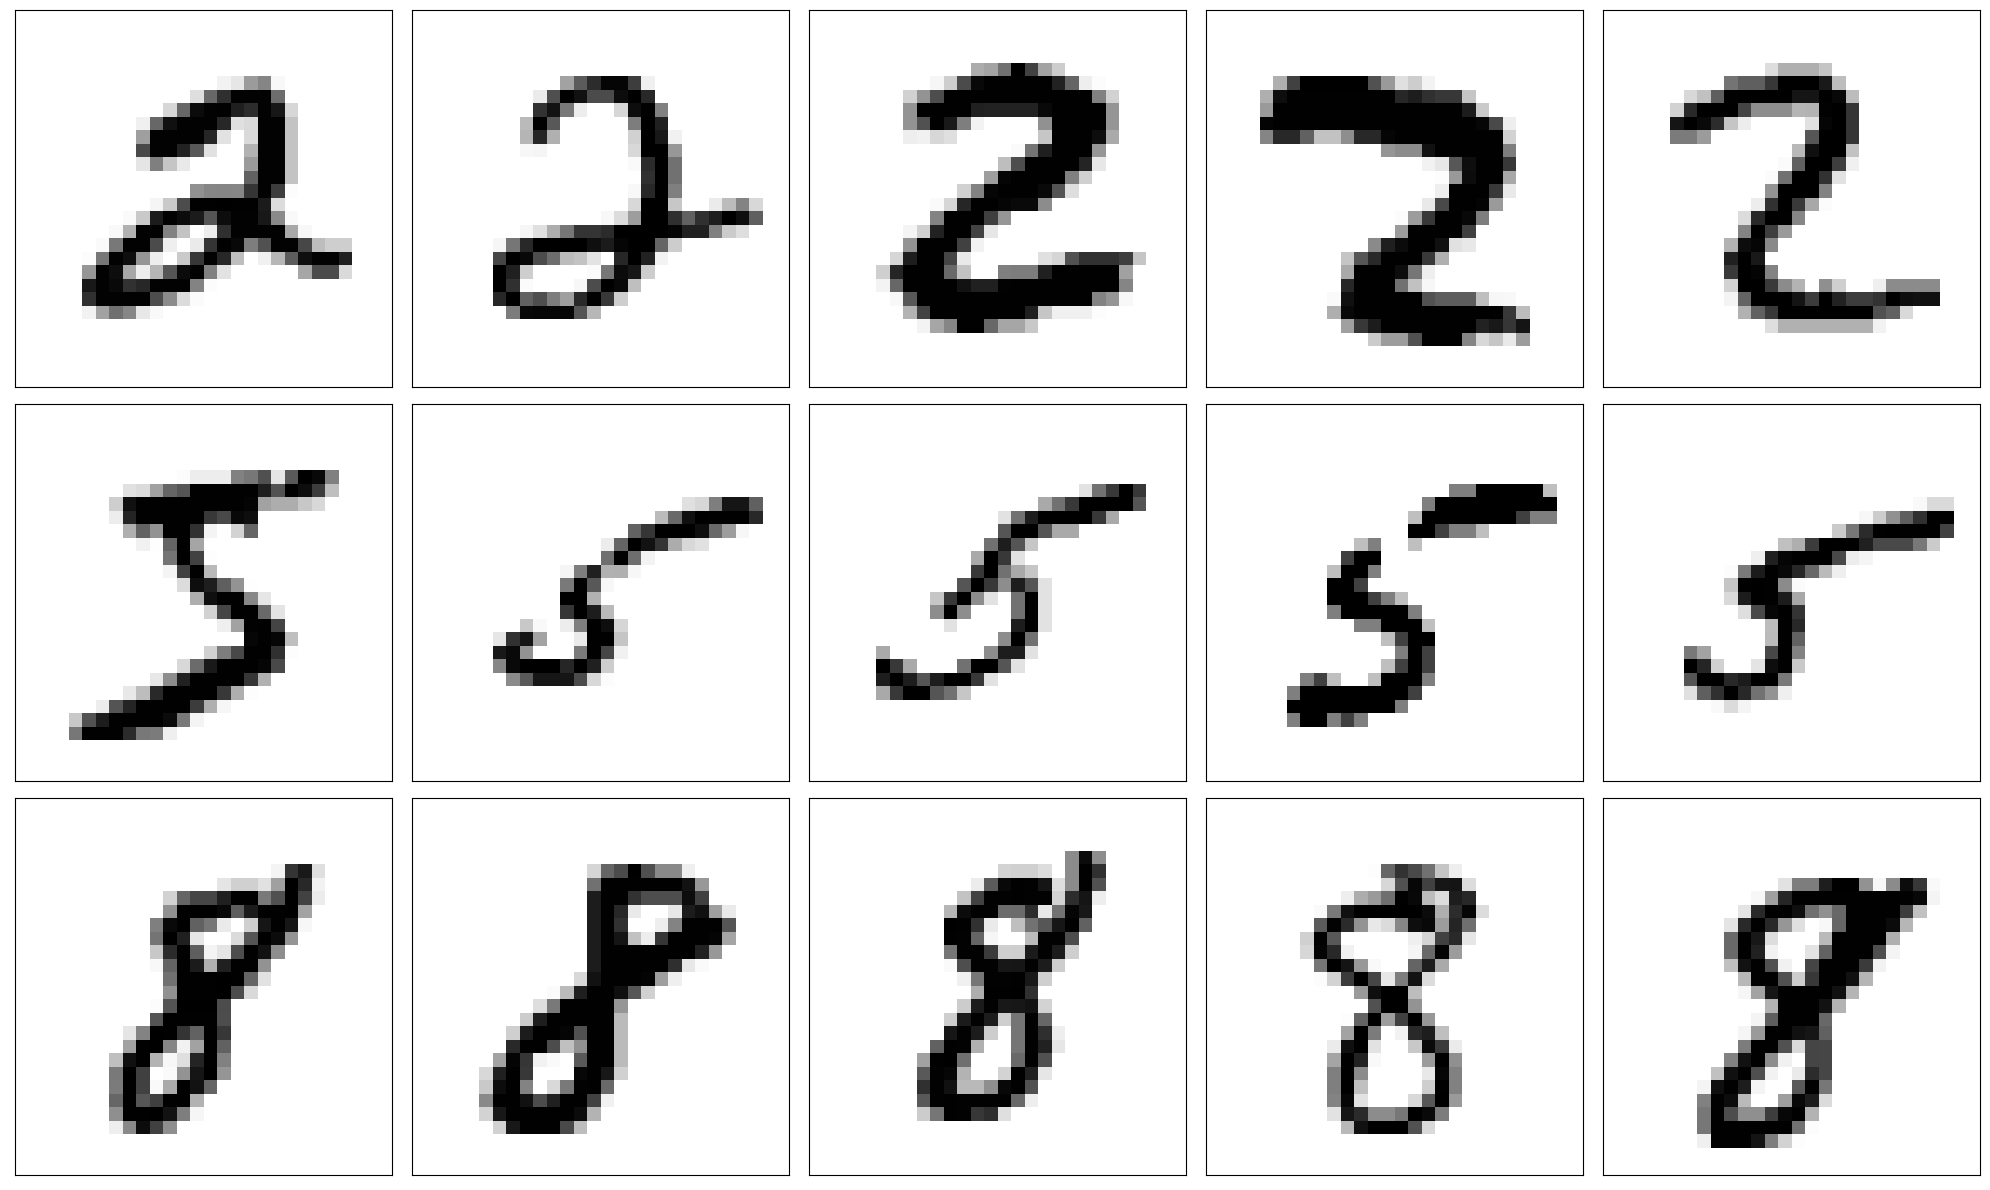

In [9]:
test_labels = [2,5,8]
n_images_per_label = 5

fig = plt.figure(figsize=(4*n_images_per_label, 4*len(test_labels)))
for i in range(len(test_labels)):
  for j in range(n_images_per_label):
    ax_number = i * n_images_per_label + 1 + j
    ax = fig.add_subplot(len(test_labels), n_images_per_label, ax_number)

    ax.imshow(mnist_dict[test_labels[i]][j], cmap='gray_r')
    
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()

# Exercise 2 
Now focus on the 3s only and create a data matrix $X$ of dimension $N$ (# datapoints) by $D$ (# features).

What are the features in this problem? How many features are there? 

In [28]:
features = images_all_digits[3].flatten()
num_features = features.shape[0]
print("Features:", features)
print("Number of Features:", num_features)

Features: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  96 244 251 253  62   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 251 251
 253  62   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  68 236 251 211 

# Exercise 3 
Now compute and plot the "mean" three.

"Standardize" your features by subtracting the mean three and generate a new data matrix $\mathbf X'$. 

Visualise some of the images and compare to the original data. 

In [11]:
mean_3 = np.mean(mnist_dict[3], axis=0)
X = np.array(mnist_dict[3]) 
X_prime = X - mean_3

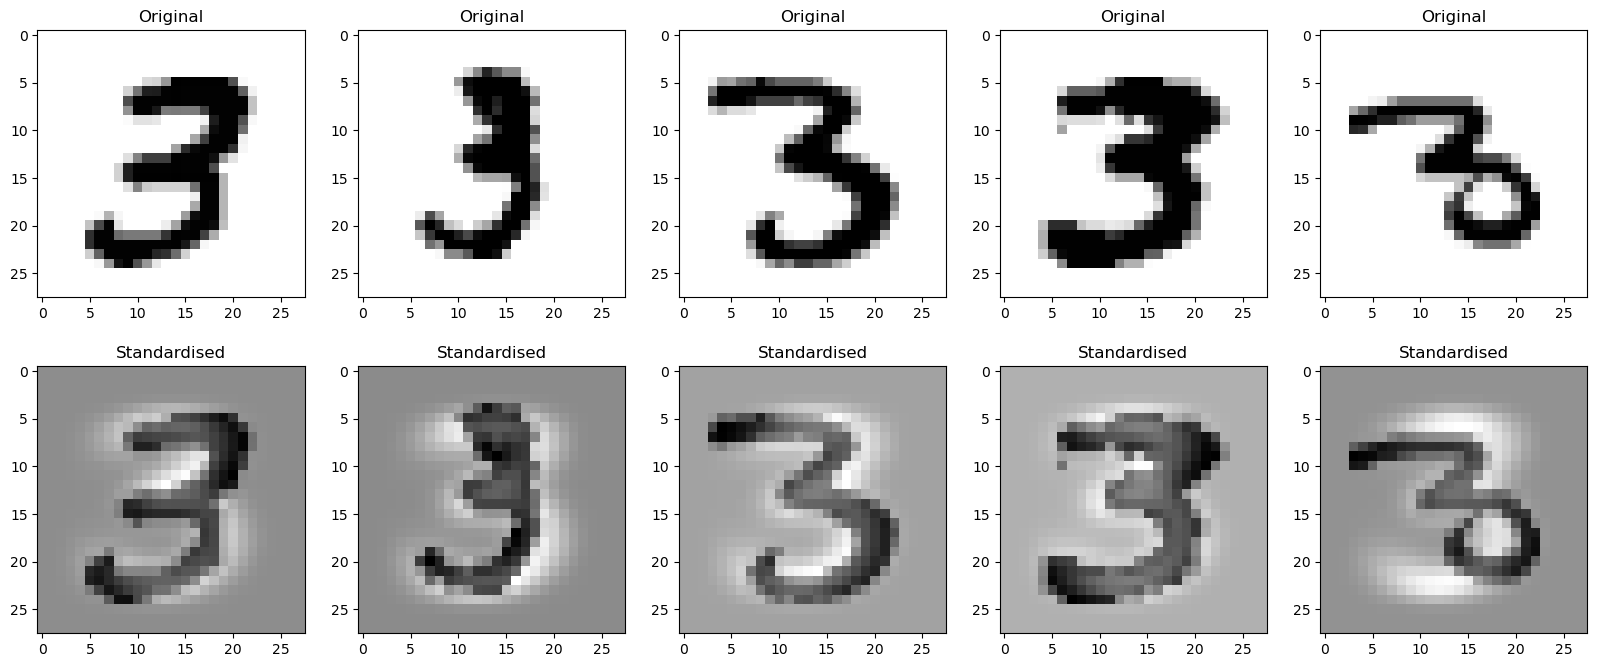

In [12]:
n_images_plot = 5
fig, ax = plt.subplots(2, n_images_plot, figsize=(4*n_images_plot, 8))
for j in range(n_images_plot):
  ax[0, j].imshow(X[j], cmap='gray_r')
  ax[1, j].imshow(X_prime[j], cmap='gray_r')
  ax[0, j].set_title("Original")
  ax[1, j].set_title("Standardised")

# Exercise 4
Using an appropriate matrix decomposition of $\mathbf X'$, find a set of basis vectors, $\{\mathbf v_k\}$, the first $q$ of which would produce the optimal rank-$q$ reconstruction of $\mathbf X'$. 

You might like to use a function from within the scipy.linalg package. 

Check the documentation of the function you apply to understand the connection with the methods in the lecture notes. What are the shapes of the matrices you obtain, do they match what you expect? 

Plot the dominant three basis vectors $\mathbf v_{1,2,3}$ as images.  

Verify they are an orthogonal basis. 

In [13]:
X_prime.shape

(6131, 28, 28)

In [14]:
from scipy.linalg import svd

X_prime = X_prime.reshape(6131, num_features)
U,D, VT = svd(X_prime, full_matrices=True)
U.shape, D.shape, VT.shape

((6131, 6131), (784,), (784, 784))

In [15]:
V = VT.T[:,:3]

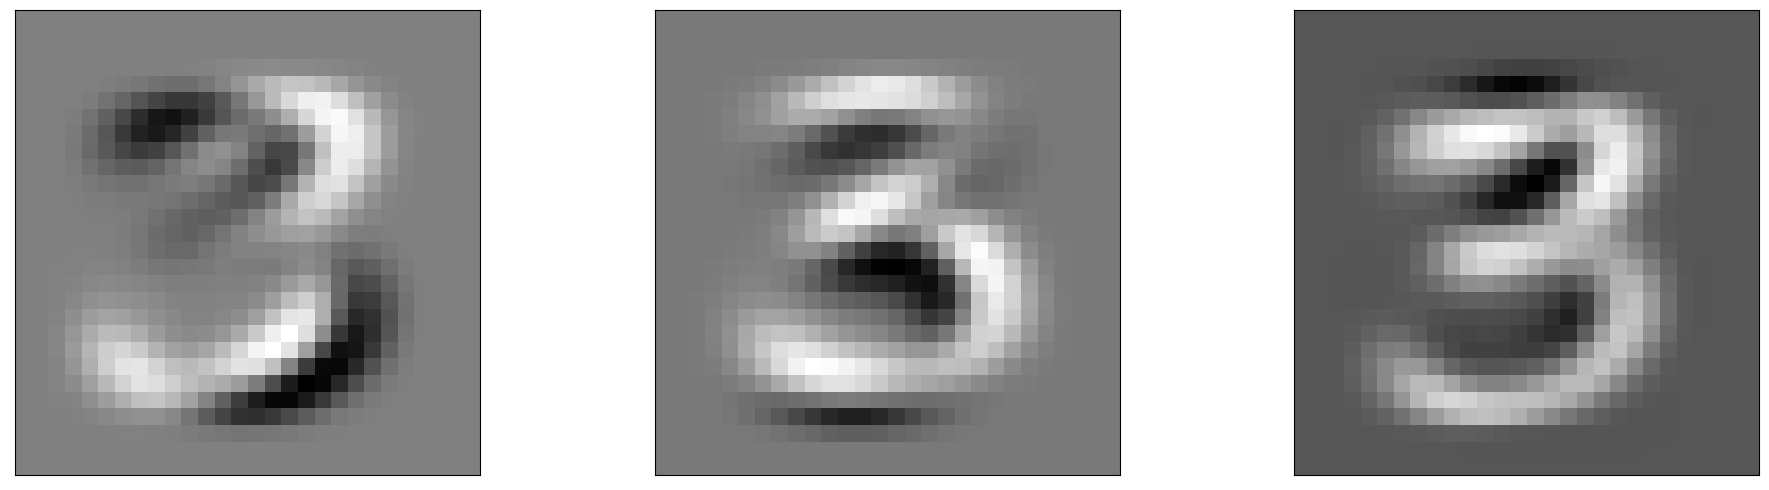

In [16]:
fig = plt.figure(figsize=(20,5))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    ax.imshow(V[:,i].reshape(28,28), cmap='gray_r')
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()

In [17]:
for i in range(3):
    for j in range(3):
        dot_product = np.dot(V[:,i],V[:,j])
        if i ==j:
            print(f"The dot product of V[:, {i}] & V[:, {j}] is {dot_product}. Hence, the vectors are orthogonal.")
        else:
            print(f"The dot product 0f V[:, {i}] & V[:, {j}] is {dot_product}. Hence, the vectors are not orthogonal.")

The dot product of V[:, 0] & V[:, 0] is 1.0000000000000004. Hence, the vectors are orthogonal.
The dot product 0f V[:, 0] & V[:, 1] is 2.632442874794805e-16. Hence, the vectors are not orthogonal.
The dot product 0f V[:, 0] & V[:, 2] is -5.663872149064275e-16. Hence, the vectors are not orthogonal.
The dot product 0f V[:, 1] & V[:, 0] is 2.632442874794805e-16. Hence, the vectors are not orthogonal.
The dot product of V[:, 1] & V[:, 1] is 1.0000000000000013. Hence, the vectors are orthogonal.
The dot product 0f V[:, 1] & V[:, 2] is 1.6544925152128798e-16. Hence, the vectors are not orthogonal.
The dot product 0f V[:, 2] & V[:, 0] is -5.663872149064275e-16. Hence, the vectors are not orthogonal.
The dot product 0f V[:, 2] & V[:, 1] is 1.6544925152128798e-16. Hence, the vectors are not orthogonal.
The dot product of V[:, 2] & V[:, 2] is 1.0000000000000004. Hence, the vectors are orthogonal.


# Exercise 5
How is the algorithm you applied above related to the covariance matrix of our dataset of 3s? Perform an appropriate matrix decomposition of the covariance matrix and verify the correspondence. 

Note: the numbers involved will likely be very large. Think about a meaningful way to check the agreement and the plots you might want to generate. 

In [18]:
from scipy.linalg import svd, eigh

mean_X = np.mean(X, axis=0) # calculate the mean of the data
cov_mat = np.cov(X_prime.T) # calculate the covariance matrix
eigvals, eigvecs = eigh(cov_mat) # perform the eigenvalue decomposition

# Exercise 6 
Now take your data matrix $\mathbf X'$ and randomly shuffle each of the data points (i.e. each *row*). Plot some examples to verify you have done this correctly.

Don't overwrite your original array! 

In [19]:
n_rows = X_prime.shape[0]
perms = np.random.permutation(n_rows)
X_shuffle = X_prime[perms,:]

# Exercise 7
Compare the singular values of the original data matrix of threes with the shuffled version. What do the results tell you, and why? 

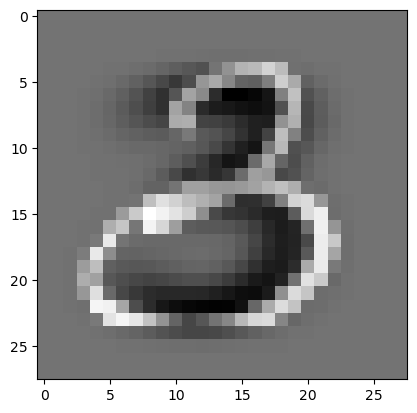

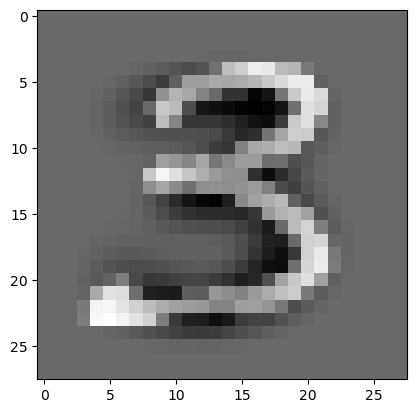

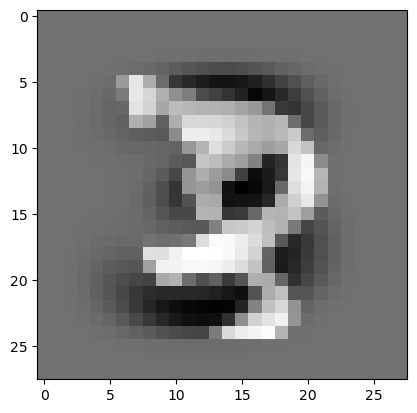

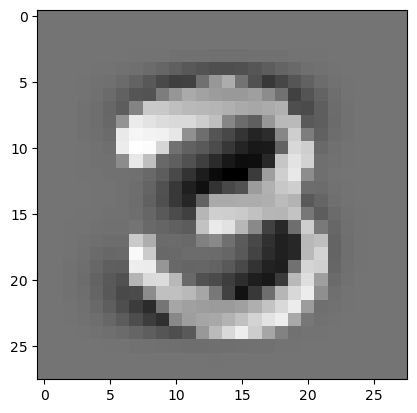

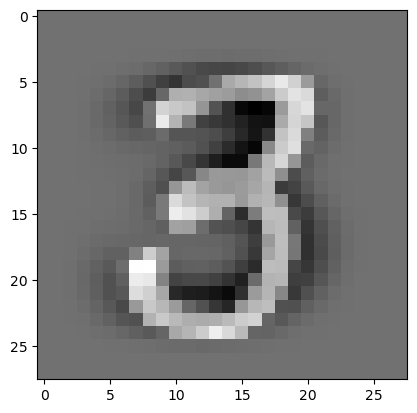

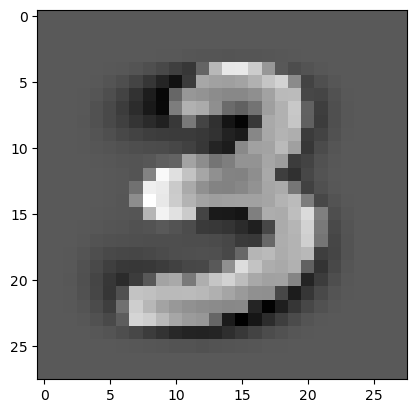

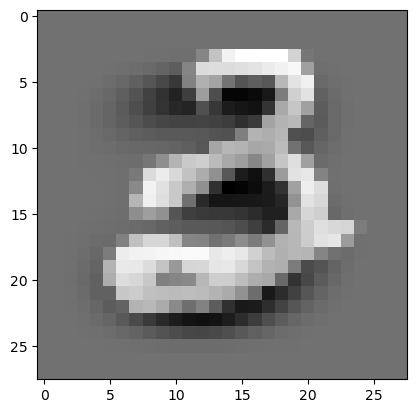

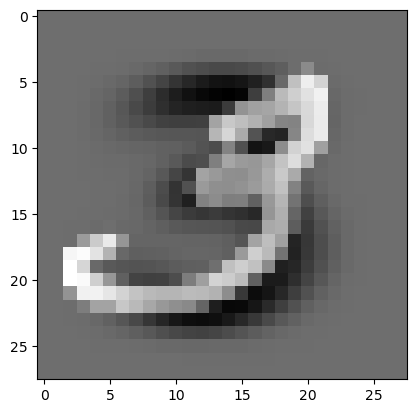

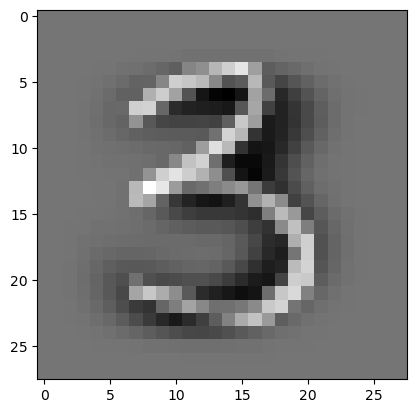

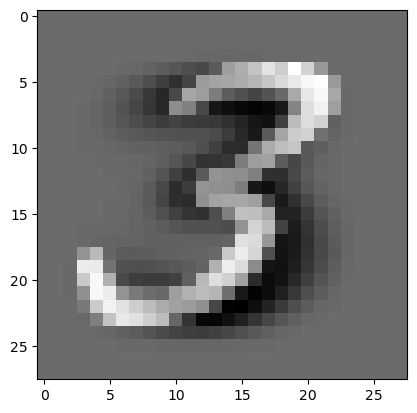

In [20]:
for i in range(10):
    plt.imshow(X_shuffle[i].reshape(28, 28), cmap='gray')
    plt.show()


# Exercise 8 
Make a low rank-$q$ tunrcation. What value of $q$ do you think is acceptable here? Note computing the projections might be quite intensive if you set $q$ to be large! 

Verify the reconstruction for a few images. You may want to refer to some of the equations derived/used in the lecture notes. 

In [21]:
U, S, VT = svd(X_prime)

# Assuming 1 = 3
q = 3


U_q = U[:, :q]
D_q = D[:q]
VT_q = VT[:q, :]

# Compute the low-rank truncation of X_prime
X_prime_q = U_q @ np.diag(D_q) @ VT_q
X_prime_q

array([[ 3.74825857e-15, -1.27312215e-12,  2.22152585e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.05747218e-16, -3.43825804e-16, -8.34044114e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.08308490e-15,  5.00255212e-13,  1.12103146e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.43747279e-15, -7.96057359e-13,  2.27510009e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.12252420e-16,  2.30903438e-13, -1.91298641e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.54764769e-15, -5.61446583e-13, -1.04878338e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

# Exercise 9 
Now consider the low-rank orthogonal vectors (columns of $\mathbf V_q$) you used to reconstruct the 3s in exercise 8. 

Let's try and use this as a basis for the other numbers. Try and reconstruct some of the other digits and compare the error. (Remember, in the notes, we derived the vectors $\boldsymbol \mu$ and $\mathbf w_j$ without specifying the basis vectors in $\mathbf V_q$. These solutions are the optimal choice for any given set of $q$ orthogonal vectors. We found the optimal basis for the data afterwards!)



---



How are you going to measure "error" here? You might want to discuss with the tutors

In [22]:
original_data = X_prime
reconstruct_data = X_prime_q

MSE = np.mean(np.sqrt((original_data - reconstruct_data)**2))

print("Error: ", MSE)

Error:  26.53611528672649


# Exercise 10

Can you offer a simple explanation for why the reconstruction of some classes is noticably better than others?  

The the data structure of the class affects the reconstruction of different classes using low-rank approximation method

When the data in a particular class is well-represented by a low-rank approximation, then the reconstruction error will be low. However, when the data in a particular class has more complex structure can cannot be well-represented by a low-rank approximation, the reconstruction error will be high. 

The low-rank approximation will bring a loss of information and a less accurate reconstruction. as it only captures the dominant pattern of the data and ignores other details.

# Exercise 11
Plot the first two principle components of your 3 dataset (you might want to select only a small number of points to plot). Can you attach any significance to these directions in terms of what they mean for the underlying image? (e.g. what is the effect of increasing the weighting of one of these PCs with the other held fixed?) 

NB this can be challenging (there might not be a clear answer!) but can give useful insights.

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_prime)

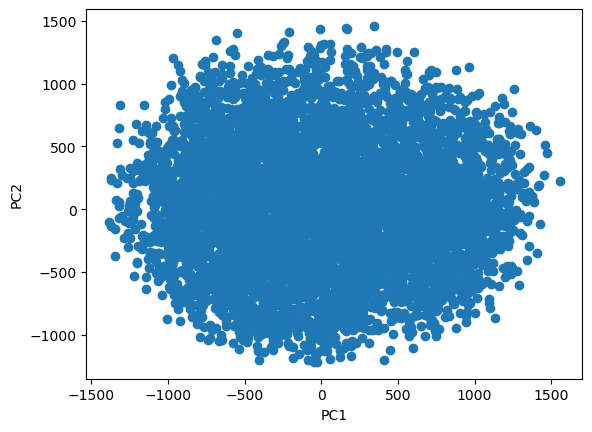

In [24]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Exercise 12
Finally, consider now all of your images (for all digits). Compute the principle components for this dataset and plot the projection of the data onto the first few. If you plot (e.g.) PC1 vs PC2 (or others) do clusters emerge? 


---
This task is a little more open-ended and is something you can play around with to build intuition. Do not feel you have to finish it in the workshop or for the submission, I'm happy to discuss after the lecture next week or in the workshop. 


Yes cluster emerged as shown above